# Machine Learning 101 - Preprocessing

## How to Prepare a Dataset for Machine Learning Models

Author: Kris Barbier

### Overview:
This notebook aims to outline the steps needed to prepare a set of data for machine learning, a process called preprocessing.

### Preprocessing Overview

- Once a data set has been sufficiently cleaned and explored for the task at hand, it needs to be processed in such a way that a machine learning model can use it to solve the problem outlined. This involves several steps, outlined below:
    - Import libraries for machine learning, and load in data set.
    - Perform a validation split (train/test split).
    - Transform features to be standardized and become numerical data types.
    - Use ETL style pipelines to create a preprocessing object that can be reused.
    - Finally, use the preprocessor to transform the data into the needed format.
        
- After completing these steps, the data will be ready to plug into a machine learning model!

## Preprocessing Steps in Code

### Load Libraries and Read in Data

- Here, we will import common libraries for data science and machine learning. Scikit-learn, or sklearn, is a common machine learning library that has several different modules to select tools from.

In [1]:
#Common imports for data science
import pandas as pd
import numpy as np

#Imports for machine learning 
from sklearn.model_selection import train_test_split  #For validation split

#Imports for feature transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#Imports for building preprocessing object
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

#Set sklearn output to pandas
from sklearn import set_config
set_config(transform_output = 'pandas')

#Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in sample dataset from repo folder
file_path = "Data/insurance_mod.csv"
df = pd.read_csv(file_path)
#Preview data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


- Before moving on, normally we would do some EDA (exploratory data analysis) to familiarize ourselves with the data. EDA is not a focus for this lesson, so we will move onto the next step, the validation split.

### Perform Validation Split

- Now, we are ready to start building our preprocessor. In order to create a machine learning model that we can have confidence in when looking at new and unseen data, we need to perform a validation split. This split will use the majority of data to train the model on, while a small subset is reserved to test the model on. The testing set acts as new/unseen data, and will give us the chance to see how well our machine learning models might perform in the real world. This is an imperative step for supervised machine learning models, and cannot be overlooked!
- In order to perform the split, we define two variables: X and y. The y variable is the target, or the variable the model will be predicting. In this case, it is charges.
- Then, the data is split into training and testing data. The default split is 75/25% for training and testing, respectively.

In [3]:
#Define X and y variables
y = df['charges']
X = df.drop(columns = 'charges')

In [4]:
#Perform validation split
#Setting a random state will make this reproducible in the future
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Verify the split is correct
X_train.head()  #Note the absence of the charges column from the X_train data

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,0,northwest
1297,28,female,26.510,2,0,southeast
634,51,male,39.700,1,0,southwest
1022,47,male,36.080,1,1,southeast
178,46,female,28.900,2,0,southwest


### Transform Features

- After splitting the data into two sets, we will perform the steps needed to transform the features into machine learning ready variables, using imputation for missing values (if any), scaling for numeric variables, and encoding the categorical variables.
- Because machine learning models cannot run when there are null values present in a data set, all null values must be filled. As a data scientist, you must choose what strategy you use to fill the missing values. Some common strategies include using the median or mean for numeric values, or to use a meaningful placeholder for categorical values. Below, I use mean for numeric, and a placeholder for categorical.
- Scaling is the process of standardizing numeric values to account for different types of measurements across all columns of data. Standard scaling is a common way to do this, and it will transform each column to have a mean of 0 and a standard deviation of 1.
- Finally, categorical variables need to be "encoded," which turns them into numeric values. OneHotEncoding is a popular choice for encoding, but is not the only choice one could make. When using OneHotEncoding, categorical columns will be split into new columns that contain values of 0 and 1. If the value of the original data matches the new column, the new value will be 1. If it does not match, it will be 0.

In [5]:
#Define numeric and categorical columns
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

In [6]:
##Instantiate transformers

#Simple Imputer - imputes missing values
#Here are two imputers, one for categorical and one for numeric data
#Categorical imputer:
impute_missing = SimpleImputer(strategy='constant', fill_value='Missing')

#Numeric imputer:
impute_mean = SimpleImputer(strategy='mean')

#Standard scaler:
scaler = StandardScaler()

#OneHotEncoder:
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Create Pipelines

- The next step will be to create pipelines for each type of data that will include the transformers created above. These pipelines make it easy to control the flow of data into the final preprocessing object.
- This is a more advanced way to create a preprocessing object, and is meant to mimic the ETL workflows used in many real-world data projects.

In [7]:
##Create two pipelines
#Numerical pipeline
num_pipe = make_pipeline(impute_mean, scaler)

#Categorical pipeline
cat_pipe = make_pipeline(impute_missing, cat_encoder)

### Final Preprocessor

- Here, we will make the final preprocessing object that we will use to transform the data into the format needed for machine learning. The preprocessing object is called a "column transformer," and requires certain arguments when it is created, included tuples containing information about each pipeline created above.

In [8]:
##Create tuples for each pipeline
##Include a title for the pipeline, the pipe variable, and the column variable

#Numeric tuple
num_tuple = ('Numeric', num_pipe, num_cols)

#Categorical tuple
cat_tuple = ('Categorical', cat_pipe, cat_cols)

In [9]:
##Finally, create final preprocessor
preprocessor = ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out= False)

#View preprocessor
preprocessor

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'bmi', 'children', 'smoker'], dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['sex', 'region'], dtype='object'))],
                  verbose_feature_names_out=False)

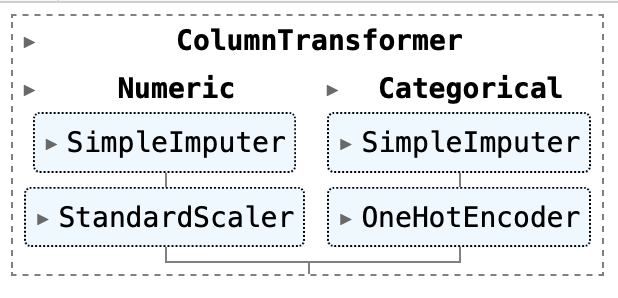

- When we view the final preprocessor, we can see that it includes all of the transformers we created earlier, as they pertain to the different types of data (numeric and categorical).

### Final Steps: Fit and Transform Data

- After completing the preprocessing object, the next step is to use it to actually transform the data into the format needed for machine learning models to use. Until now, the data is not scaled, imputed, or encoded, so we need to complete this final step before we can start using models.
- When transforming the data, we never want to fit it onto training data, as this will invalidate the split. Only use transform on the testing data!

In [10]:
#Fit preprocessor to training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'bmi', 'children', 'smoker'], dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['sex', 'region'], dtype='object'))],
                  verbose_feature_names_out=False)

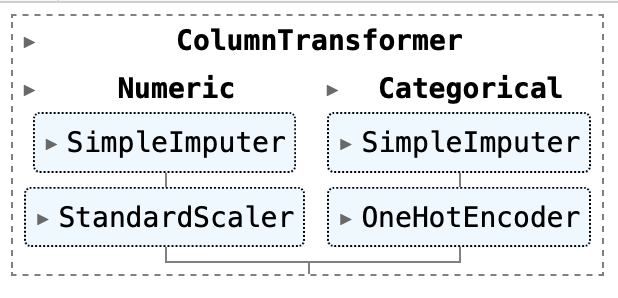

In [11]:
#Transform training and testing data and save as new, transformed variables (tf)
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

#Verify the change:
X_train_tf.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
693,-1.087167,-1.140875,-0.917500,-0.508399,0.0,1.0,0.0,1.0,0.0,0.0
1297,-0.802106,-0.665842,0.743605,-0.508399,1.0,0.0,0.0,0.0,1.0,0.0
634,0.836992,1.528794,-0.086947,-0.508399,0.0,1.0,0.0,0.0,0.0,1.0
1022,0.551932,0.926476,-0.086947,1.966960,0.0,1.0,0.0,0.0,1.0,0.0
178,0.480667,-0.268178,0.743605,-0.508399,1.0,0.0,0.0,0.0,0.0,1.0


- In this final output, we can see that the numeric data was scaled, and the categorical data was encoded. Now, we can use this data for machine learning!

## Conclusion

- Preprocessing is a necessary step in order to prepare data for machine learning modeling. The steps to be taken include:
    1. Validation Split: Split the data into two parts, training and testing. This is to validate that the model can be used on unseen data.
    2. Transform features based on data types:
    - Numeric data needs to have missing values imputed, and be scaled to account for different units of measurement.
    - Categorical data needs to have missing values imputed and features encoded to become numeric values.
    3. Create pipelines to easily plug data into the preprocessing object.
    4. Use the preprocessor to transform data into the proper format. Never fit the preprocessor on the testing data, only the training data.
    
- For additional questions or more information, contact the author at krisbarbier02@gmail.com